The goal of this notebook is to analyze student performance data to predict what leads to higher scores.

The original dataset can be found here: https://www.kaggle.com/datasets/bhavikjikadara/student-study-performance?resource=download 

In [34]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [35]:
# load in the data
rawDF = pd.read_csv("study_performance.csv")

rawDF.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [36]:
rawDF.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [37]:
rawDF.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [38]:
# Now to Encode the data

## first we group the categorical columns
categoricalCols = ['gender', 'race_ethnicity', 'parental_level_of_education', 
                   'lunch', 'test_preparation_course']

categoricalCols

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [39]:
## We will use onehot encoding to not put any extra emphasis on any of the variables

from sklearn.preprocessing import OneHotEncoder

# instantiate and fit the one hot encoder
encoder = OneHotEncoder(sparse=False)
encoderArray = encoder.fit_transform(rawDF[categoricalCols])
colNames = encoder.get_feature_names_out()

# fix the shape
colNames = np.array(colNames).ravel()

# get the dataframe of the 
oneHotDF = pd.DataFrame(encoderArray, columns=colNames)

oneHotDF.head()

/Users/jpdeaton/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [40]:
df = pd.concat([rawDF, oneHotDF], axis=1).drop(columns = categoricalCols)

df.head()

,math_score,reading_score,writing_score,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,72,72,74,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,69,90,88,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,90,95,93,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,47,57,44,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,76,78,75,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


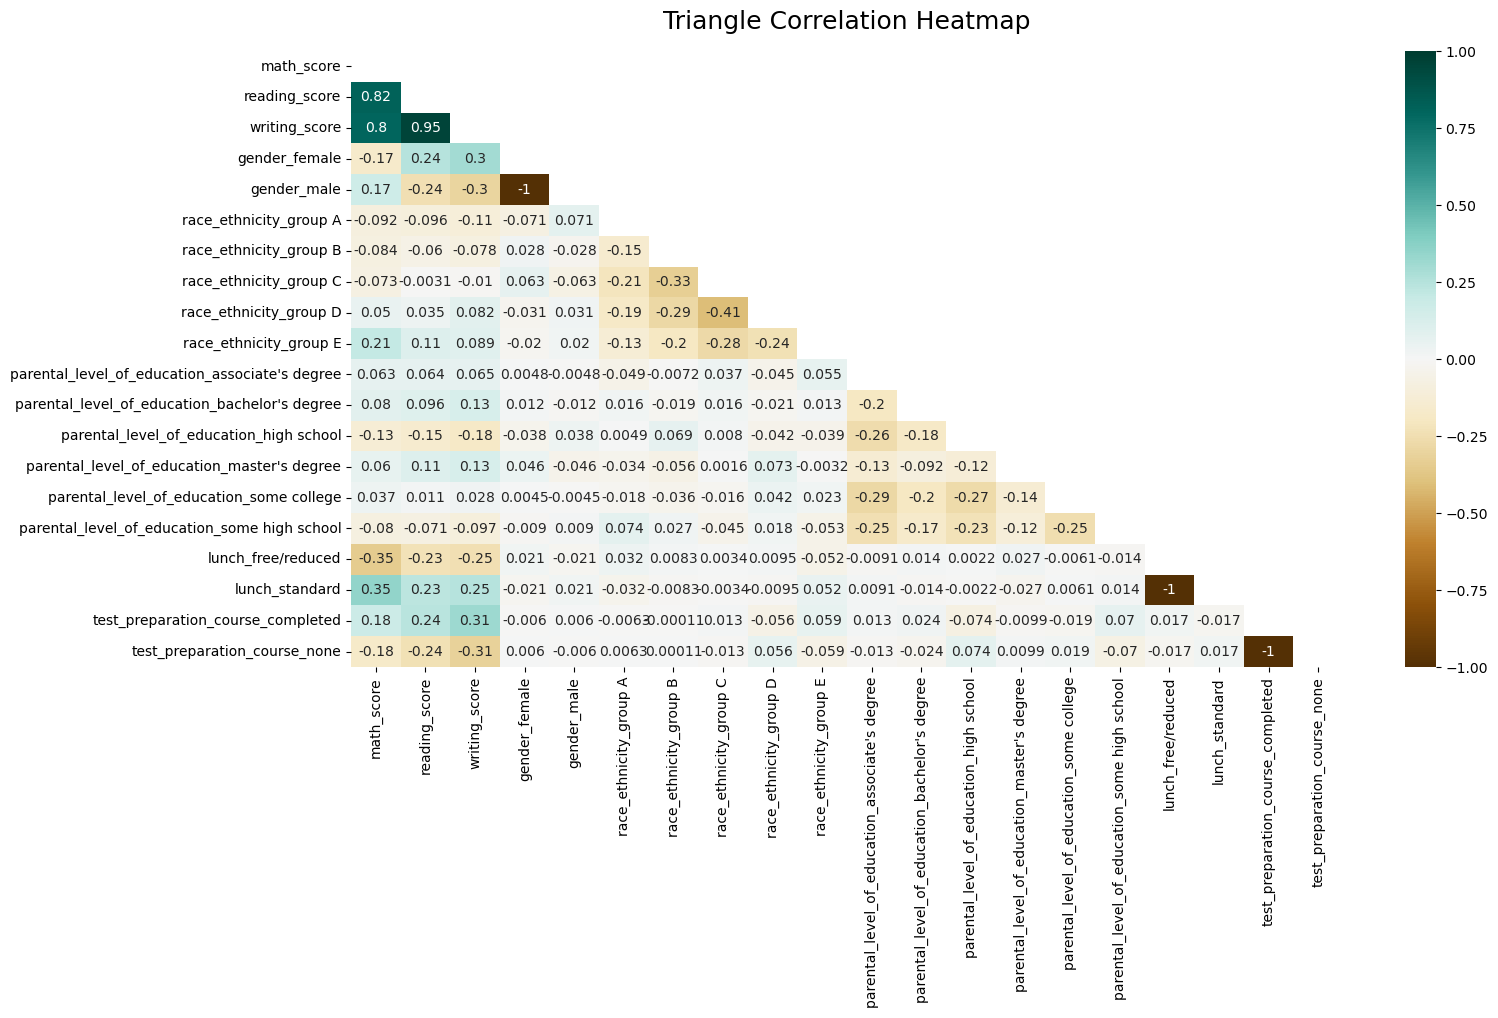

In [41]:
## Next to explore the correlation we build a heatmap

plt.figure(figsize=(16, 8))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [42]:
# Splitting the target variable from the features

## Our target will be the reading, writing, and math scores
y1DF = df["math_score"]
y2DF = df["reading_score"]
y3DF = df["writing_score"]
xDF = df.drop(columns=["math_score", "reading_score", "writing_score"], axis=1)

print(xDF.columns)
xDF.head()

Index(['gender_female', 'gender_male', 'race_ethnicity_group A',
       'race_ethnicity_group B', 'race_ethnicity_group C',
       'race_ethnicity_group D', 'race_ethnicity_group E',
       'parental_level_of_education_associate's degree',
       'parental_level_of_education_bachelor's degree',
       'parental_level_of_education_high school',
       'parental_level_of_education_master's degree',
       'parental_level_of_education_some college',
       'parental_level_of_education_some high school', 'lunch_free/reduced',
       'lunch_standard', 'test_preparation_course_completed',
       'test_preparation_course_none'],
      dtype='object')


,gender_female,gender_male,race_ethnicity_group A,race_ethnicity_group B,race_ethnicity_group C,race_ethnicity_group D,race_ethnicity_group E,parental_level_of_education_associate's degree,parental_level_of_education_bachelor's degree,parental_level_of_education_high school,parental_level_of_education_master's degree,parental_level_of_education_some college,parental_level_of_education_some high school,lunch_free/reduced,lunch_standard,test_preparation_course_completed,test_preparation_course_none
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [43]:
# Starting the Predictions we split our dataset

from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(
    xDF, y1DF,
    test_size=0.05,
    shuffle=True
)

In [44]:
from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()
xColNames = xTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])

In [45]:
# Now we need to find the hyperparameters

## The models I will be using are Linear Regression, Decision Tree, Random Forest, 
## SVM, Neural Nets, and AdaBoost Regressor

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
# from sklearn.linear_model import LinearRegression

# parameters = {
#               "fit_intercept": [True, False],
#               "positive" : [True, False]
#              }
# gridSearch = GridSearchCV(estimator = LinearRegression(),  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)


# gridSearch.fit(xTrainScaled, yTrain) 

# linearParams = gridSearch.best_params_

# linearParams

In [48]:
linearParams = {'fit_intercept': True, 'positive': True}

In [49]:
# from sklearn.tree import DecisionTreeRegressor

# parameters = {
#               'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
#               'splitter': ['best', 'random'],
#               'max_depth': [None, 3, 5, 7],
#               'min_samples_split': [2, 5, 10],
#               'min_samples_leaf': [1, 2, 4],
#               'max_features': [None, 'sqrt', 'log2']}

              
# gridSearch = GridSearchCV(estimator = DecisionTreeRegressor(),  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)


# gridSearch.fit(xTrainScaled, yTrain) 

# treeParams = gridSearch.best_params_

# treeParams

In [50]:
treeParams = {'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [51]:
# from sklearn.ensemble import RandomForestRegressor

# parameters = {
#                 'bootstrap': [True, False],
#                 'max_depth': [10, 50, 100, None],
#                 'min_samples_leaf': [1, 2, 4],
#                 'min_samples_split': [2, 5, 10],
#                 'n_estimators': [400, 800, 1200]}

              
# gridSearch = GridSearchCV(estimator = RandomForestRegressor(),  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)


# gridSearch.fit(xTrainScaled, yTrain) 

# forestParams = gridSearch.best_params_

# forestParams

In [52]:
forestParams = {'bootstrap': True,
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 400}

In [53]:
# from sklearn.svm import SVR

# parameters = {
#               'C':[1,10,100,1000],
#               'gamma':[1, 0.1, 0.001, 0.0001],
#               'kernel':['linear','rbf']}
# gridSearch = GridSearchCV(estimator = SVR(),  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)


# gridSearch.fit(xTrainScaled, yTrain) 

# svmParams = gridSearch.best_params_

# svmParams

In [54]:
svmParams = {'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [55]:
# from sklearn.neural_network import MLPRegressor

# parameters = {
#     'max_iter': [1000],
#     'hidden_layer_sizes': [(50,50), (50,50,50), (100)],
#     'activation': ['relu'],
#     'solver': ['adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }
# gridSearch = GridSearchCV(estimator = MLPRegressor(),  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)


# gridSearch.fit(xTrainScaled, yTrain) 

# mlpParams = gridSearch.best_params_

# mlpParams

In [56]:
mlpParams = {'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'constant',
 'max_iter': 1000,
 'solver': 'adam'}

In [57]:
# from sklearn.ensemble import AdaBoostRegressor

# parameters = {
#                 'n_estimators': [50, 100],
#                 'learning_rate' : [0.01, 0.05, 0.1, 0.3, 1],
#                 'loss' : ['linear', 'square', 'exponential']}

              
# gridSearch = GridSearchCV(estimator = AdaBoostRegressor(),  
#                            param_grid = parameters,
#                            scoring = 'recall',
#                            cv = 5,
#                            verbose=0)


# gridSearch.fit(xTrainScaled, yTrain) 

# adaParams = gridSearch.best_params_

# adaParams

In [58]:
adaParams = {'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 50}

In [59]:
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [60]:
from sklearn.linear_model import LinearRegression

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2Scores = []
mean2Scores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], y1DF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = LinearRegression(**linearParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = r2_score(yVal, yPred)
    r2Scores.append(score)

    score = mean_squared_error(yVal, yPred, squared=False)
    mean2Scores.append(score)


    print(f"Completed Fold {i}")
    print(f"    r2={r2Scores[i]}    root mean={mean2Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(r2Scores) / len(r2Scores)
print("Mean r2 score:", mean_score)

mean_score = sum(mean2Scores) / len(mean2Scores)
print("Mean root mean score:", mean_score)

Completed Fold 0
    r2=0.20996800475292587    root mean=14.006107603730987
Completed Fold 1
    r2=0.31956269276117943    root mean=12.78537994365256
Completed Fold 2
    r2=0.20588128247829707    root mean=12.886091173003429
Completed Fold 3
    r2=0.2550274509628079    root mean=13.19334932285495
Completed Fold 4
    r2=0.22396636912373302    root mean=12.56185857111184
Mean r2 score: 0.24288116001578866
Mean root mean score: 13.086557322870751


In [63]:
from sklearn.tree import DecisionTreeRegressor

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2Scores = []
mean2Scores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], y1DF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = DecisionTreeRegressor(**treeParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

  # Calculate metrics and store them
    score = r2_score(yVal, yPred)
    r2Scores.append(score)

    score = mean_squared_error(yVal, yPred, squared=False)
    mean2Scores.append(score)


    print(f"Completed Fold {i}")
    print(f"    r2={r2Scores[i]}    root mean={mean2Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(r2Scores) / len(r2Scores)
print("Mean r2 score:", mean_score)

mean_score = sum(mean2Scores) / len(mean2Scores)
print("Mean root mean score:", mean_score)  

Completed Fold 0
    r2=0.31156616817691196    root mean=13.074534065291687
Completed Fold 1
    r2=0.36558557926117263    root mean=12.345426637426332
Completed Fold 2
    r2=0.21604410977095112    root mean=12.803370031933236
Completed Fold 3
    r2=0.3469168028977667    root mean=12.352907276741478
Completed Fold 4
    r2=0.28980767266479546    root mean=12.017153710807088
Mean r2 score: 0.3059840665543196
Mean root mean score: 12.518678344439964


In [66]:
from sklearn.ensemble import RandomForestRegressor

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2Scores = []
mean2Scores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], y1DF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    rlf = RandomForestRegressor(**forestParams)
    # Train the classifier on the training data
    rlf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = rlf.predict(xValScaled)

    # Calculate metrics and store them
    score = r2_score(yVal, yPred)
    r2Scores.append(score)

    score = mean_squared_error(yVal, yPred, squared=False)
    mean2Scores.append(score)


    print(f"Completed Fold {i}")
    print(f"    r2={r2Scores[i]}    root mean={mean2Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(r2Scores) / len(r2Scores)
print("Mean r2 score:", mean_score)

mean_score = sum(mean2Scores) / len(mean2Scores)
print("Mean root mean score:", mean_score)  

Completed Fold 0
    r2=0.3278314862806839    root mean=12.919157744693615
Completed Fold 1
    r2=0.40220277224236844    root mean=11.983854520998417
Completed Fold 2
    r2=0.22929757243042637    root mean=12.69468260370386
Completed Fold 3
    r2=0.3666473841768503    root mean=12.164876682243365
Completed Fold 4
    r2=0.31586528013375315    root mean=11.794633324954326
Mean r2 score: 0.3283688990528164
Mean root mean score: 12.311440975318718


In [61]:
from sklearn.svm import SVR

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2Scores = []
mean2Scores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], y1DF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = SVR(**svmParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

# Calculate metrics and store them
    score = r2_score(yVal, yPred)
    r2Scores.append(score)

    score = mean_squared_error(yVal, yPred, squared=False)
    mean2Scores.append(score)


    print(f"Completed Fold {i}")
    print(f"    r2={r2Scores[i]}    root mean={mean2Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(r2Scores) / len(r2Scores)
print("Mean r2 score:", mean_score)

mean_score = sum(mean2Scores) / len(mean2Scores)
print("Mean root mean score:", mean_score)

Completed Fold 0
    r2=0.18308477662903166    root mean=14.242414244724765
Completed Fold 1
    r2=0.2979266859464882    root mean=12.987058976629935
Completed Fold 2
    r2=0.19696166399557613    root mean=12.958258005797573
Completed Fold 3
    r2=0.2799739746144819    root mean=12.97056885844056
Completed Fold 4
    r2=0.20119166401936917    root mean=12.744855692098152
Mean r2 score: 0.2318277530409894
Mean root mean score: 13.180631155538197


In [65]:
from sklearn.neural_network import MLPRegressor

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2Scores = []
mean2Scores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], y1DF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    clf = MLPRegressor(**mlpParams)
    # Train the classifier on the training data
    clf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = clf.predict(xValScaled)

    # Calculate metrics and store them
    score = r2_score(yVal, yPred)
    r2Scores.append(score)

    score = mean_squared_error(yVal, yPred, squared=False)
    mean2Scores.append(score)


    print(f"Completed Fold {i}")
    print(f"    r2={r2Scores[i]}    root mean={mean2Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(r2Scores) / len(r2Scores)
print("Mean r2 score:", mean_score)

mean_score = sum(mean2Scores) / len(mean2Scores)
print("Mean root mean score:", mean_score)  

/Users/jpdeaton/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Completed Fold 0
    r2=0.3229840259487776    root mean=12.96565843667189
Completed Fold 1
    r2=0.39237736673947265    root mean=12.081936563371226
Completed Fold 2
    r2=0.19643759102568537    root mean=12.962485677646905
Completed Fold 3
    r2=0.3608615118383143    root mean=12.220315316213881
Completed Fold 4
    r2=0.30707004622258127    root mean=11.87020709197053
Mean r2 score: 0.3159461083549663
Mean root mean score: 12.420120617174884


In [67]:
from sklearn.ensemble import AdaBoostRegressor

cv = KFold(n_splits=5, shuffle=True, random_state=42)

r2Scores = []
mean2Scores = []

for i, (trainIndex, valIndex) in enumerate(cv.split(xTrain, yTrain)):

    ### making training and validation sets
    # Convert indices to list
    trainIndex = trainIndex.tolist()
    valIndex = valIndex.tolist()
    
    # Split the data into training and validation sets for this fold
    xLocalTrain, xVal = xTrain.iloc[trainIndex], xDF.iloc[valIndex]
    yLocalTrain, yVal = yTrain.iloc[trainIndex], y1DF.iloc[valIndex]


    ### feature scaling
    xScaler = StandardScaler()
    xColNames = xLocalTrain.columns.values.tolist()
    # train the scaler and apply it to the training set
    xTrainScaled = xScaler.fit_transform(xLocalTrain[xColNames])
    # apply the scaling to the validation set
    xValScaled = xScaler.transform(xVal[xColNames])

    ### model training
    # instantiate the model
    alf = AdaBoostRegressor(**adaParams)
    # Train the classifier on the training data
    alf.fit(xTrainScaled, yLocalTrain)
    
    ### model prediction and evaluation
    # Make predictions on the test data
    yPred = alf.predict(xValScaled)

    # Calculate metrics and store them
    score = r2_score(yVal, yPred)
    r2Scores.append(score)

    score = mean_squared_error(yVal, yPred, squared=False)
    mean2Scores.append(score)


    print(f"Completed Fold {i}")
    print(f"    r2={r2Scores[i]}    root mean={mean2Scores[i]}")

## Calculate the mean scores across all folds
mean_score = sum(r2Scores) / len(r2Scores)
print("Mean r2 score:", mean_score)

mean_score = sum(mean2Scores) / len(mean2Scores)
print("Mean root mean score:", mean_score)  

Completed Fold 0
    r2=0.1783208374431351    root mean=14.283882050635
Completed Fold 1
    r2=0.2716916878182646    root mean=13.22748303438129
Completed Fold 2
    r2=0.1841914987404789    root mean=13.060884738049387
Completed Fold 3
    r2=0.20844526734553137    root mean=13.599577033713379
Completed Fold 4
    r2=0.22218521575653594    root mean=12.576266305496198
Mean r2 score: 0.21296690142078917
Mean root mean score: 13.349618632455051


In [68]:
### feature scaling
xScaler = StandardScaler()
xColNames = xLocalTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])
# apply the scaling to the testing set
xTestScaled = xScaler.transform(xTest[xColNames])

In [69]:
################ 
# Decision Tree
################
clf = DecisionTreeRegressor(**treeParams)
clf.fit(xTrainScaled, yTrain)

preds = clf.predict(xTestScaled)

treeR2 = r2_score(yTest, preds)
treeMean2 = mean_squared_error(yTest, preds, squared=False)

################
# Random Forest
################

rlf = RandomForestRegressor(**forestParams)
rlf.fit(xTrainScaled, yTrain)

preds = rlf.predict(xTestScaled)

forestR2 = r2_score(yTest, preds)
forestMean2 = mean_squared_error(yTest, preds, squared=False)

################
# Neural Net
################

mlf = MLPRegressor(**mlpParams)
mlf.fit(xTrainScaled, yTrain)

preds = mlf.predict(xTestScaled)

nnR2 = r2_score(yTest, preds)
nnMean2 = mean_squared_error(yTest, preds, squared=False)

In [70]:
scoreDict = {"model" : ["Decision Tree", "Random Forest", "Neural Net"],
            "r2Score" : [treeR2, forestR2, nnR2],
            "Root Mean Squared" : [treeMean2, forestMean2, nnMean2]}

resultsDF = pd.DataFrame.from_dict(scoreDict)

resultsDF

,model,r2Score,Root Mean Squared
0,Decision Tree,0.130263,13.645268
1,Random Forest,0.183149,13.223899
2,Neural Net,0.196961,13.111620


This was nowhere near as good as the models I saw in my articles. There is probably some more tuning I could do to make the models better but considering the amount of time it took to run my models I don't think it would be possible to increase their effectiveness in a timely manner. I also could find different parameters to check, I found these looking through common parameters used on the given model. 

I also just ended up predicting math scores based on the features because of the amount of time it took to run the models. This probably would not effect the other targets at all but is something to note. 